#Fashion-MNIST Project

<p>In this project, you will classify  Fashion-MNIST dataset using convolutional neural networks.</p>
<ul>
  
<ul>
<li><a href="#Preparation">Preparation</a></li>
<li><a href="#Q1">Questions 1: Create a Dataset Class</li>
<li><a href="#Train">Define Softmax, Criterion function, Optimizer and Train the Model</a></li>

</ul>
 

</ul>

<p>Estimated Time Needed: <b>30 min</b></p>
<hr>

In [ ]:
# PyTorch Modules you need for this lab

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.manual_seed(0)

In [ ]:
# Other non-PyTorch Modules

from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [ ]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

##1. Create a Dataset Class

In this section, you will load a Dataset object, but first you must transform the dataset. Use the <code>Compose</code> function perform the following transforms:. 
<ol>
    <li>use the transforms object to<code> Resize </code> to resize the image.</li>
    <li>use the transforms object to<code> ToTensor </code> to concert the image to a tensor.</li>
</ol>

You will then take a screen shot of your validation data.

In [ ]:
#Hint:

IMAGE_SIZE = 16
composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

Create two dataset objects for the Fashion MNIST  dataset. One for training data called <code> dataset_train </code> and one for validation data <code>dataset_val</code>. You will be asked to take a screenshot of several samples.

In [ ]:

dataset_train=dsets.FashionMNIST(root= '.fashion/data', train=True, transform=composed,  download=True)
dataset_val=dsets.FashionMNIST(root= '.fashion/data', train=False, transform=composed, download=True)


Extracting .fashion/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw


Extracting .fashion/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw


Extracting .fashion/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to .fashion/data/FashionMNIST/raw




Extracting .fashion/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to .fashion/data/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


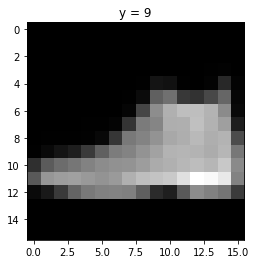

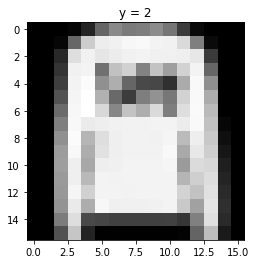

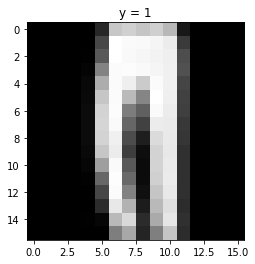

In [ ]:
for n,data_sample in enumerate(dataset_val):

    show_data(data_sample)
    plt.show()
    if n==2:
        break 

<h2 id="Q2">Questions 2</h2>
Create a Convolutional Neural Network class using ONE of the following constructors.  Train the network using the provided code then provide a screenshot of your training cost and accuracy with your validation data.

In [ ]:

class CNN (nn.Module):
  #Contructor
  def __init__(self,out_1=16,out_2=32):
      super(CNN,self).__init__()
      self.cnn1 =nn.Conv2d(in_channels=1,out_channels=out_1,kernel_size=5,padding=2)
      self.maxpool1=nn.MaxPool2d(kernel_size=2)

      self.cnn2 =nn.Conv2d(in_channels=out_1,out_channels=out_2,kernel_size=5,padding=2)
      self.maxpool2=nn.MaxPool2d(kernel_size=2)

      self.fc1=nn.Linear(out_2*4*4,10)

  
  #Prediction
  def forward(self,x):
    x=self.cnn1(x)
    x=torch.relu(x)
    x=self.maxpool1(x)
    x=self.cnn2(x)
    x=torch.relu(x)
    x=self.maxpool2(x)
    x=x.view(x.size(0),-1)
    x=self.fc1(x)
    return x

In [ ]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [ ]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(dataset_val)
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)

        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list

In [ ]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

model_batch=CNN_batch(out_1=16, out_2=32)

In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=100)

In [ ]:
import time
start = time.time()
# Train the model
accuracy_list_normal, loss_list_normal=train_model(model=model,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)
stop =time.time()
print("Time for training: ",stop -start)

Time for training:  211.69134211540222


In [ ]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
start = time.time()
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)
stop =time.time()
print("Time for training: ",stop -start)

Time for training:  268.95626497268677


## Analyze Results

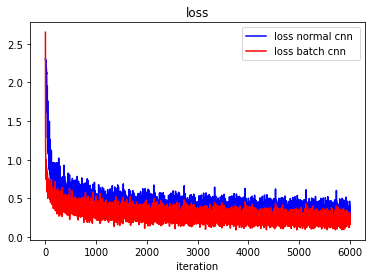

In [ ]:

# Plot the loss and accuracy

plt.plot(loss_list_normal, 'b',label='loss normal cnn ')
plt.plot(loss_list_batch,'r',label='loss batch cnn')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()


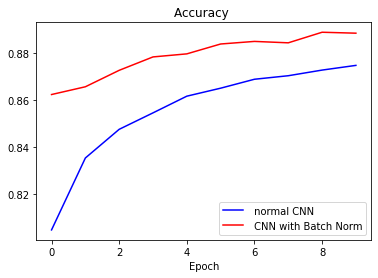

In [ ]:
plt.plot(accuracy_list_normal, 'b',label=' normal CNN')
plt.plot(accuracy_list_batch,'r',label=' CNN with Batch Norm')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()

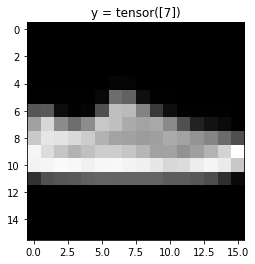

yhat:  tensor([5])


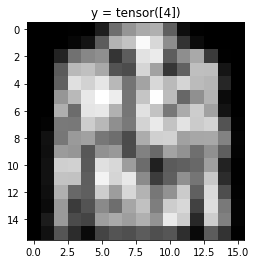

yhat:  tensor([2])


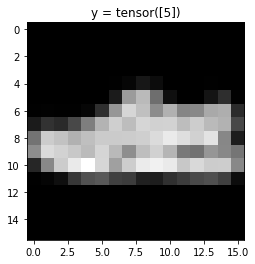

yhat:  tensor([7])


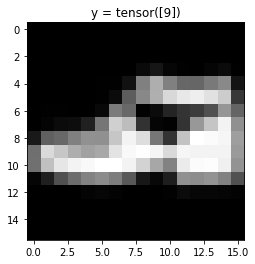

yhat:  tensor([5])


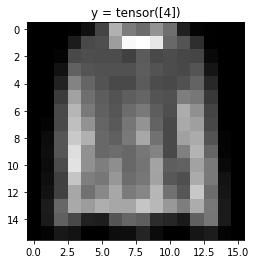

yhat:  tensor([2])


In [67]:
# Plot the mis-classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=dataset_val, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break

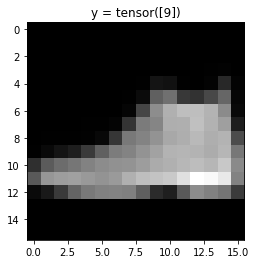

yhat:  tensor([9])


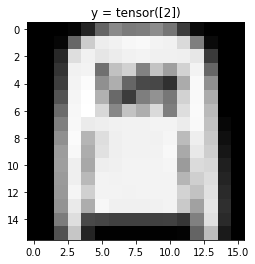

yhat:  tensor([2])


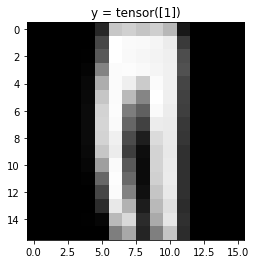

yhat:  tensor([1])


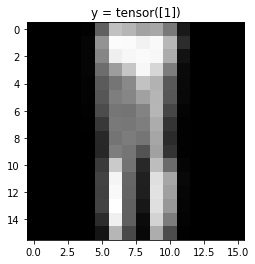

yhat:  tensor([1])


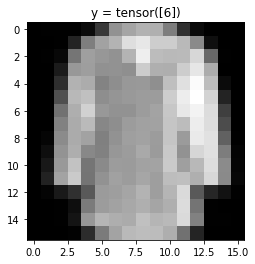

yhat:  tensor([6])


In [68]:
# Plot the true-classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=dataset_val, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break